## Modelowanie równowagi dobra i zła w układach złożonych

### Opis problemu

W badaniu ewolucyjnych układów społecznych często analizuje się konkurencję pomiędzy **dwoma strategiami zachowania**:

- **C** – dobro, współpraca (*cooperation*),  
- **D** – zło, egoizm (*defection*).


Niech:
- \( x \) oznacza **odsetek kooperatorów** w populacji,  
  przy czym \( 0 \leq x \leq 1 \),
- \( 1 - x \) to odsetek defektorów.

Zadaniem równania replikatora jest opisanie, **jak zmienia się udział strategii C w czasie**, w zależności od ich sukcesu (zysku) w interakcji z innymi.

### Średni zysk (payoff)

Każda strategia ma pewien **średni zysk** \((\pi)\), który zależy od tego, z kim osobnik wchodzi w interakcję.  
Dla dwóch strategii \(C\) i \(D\) zapisujemy to następująco:

$$
\pi_C = R \cdot x + S \cdot (1-x)
$$

$$
\pi_D = T \cdot x + P \cdot (1-x)
$$

Gdzie:

| Symbol | Znaczenie | Interpretacja |
|:--:|:--|:--|
| **R** | *Reward* | Nagroda za współpracę z innym kooperatorem (C–C) |
| **S** | *Sucker’s payoff* | Strata lub słaba korzyść dla kooperatora, który spotyka defektora (C–D) |
| **T** | *Temptation* | Pokusa defektora – zysk przy spotkaniu kooperatora (D–C) |
| **P** | *Punishment* | Kara – zysk defektora przy spotkaniu innego defektora (D–D) |

---


### Średni zysk całej populacji

Średni zysk wszystkich uczestników gry (zarówno C, jak i D) to wartość oczekiwana z ich udziałów:

$$
\bar{\pi} = x \pi_C + (1-x) \pi_D
$$

To właśnie do tej wartości odnosi się równanie replikatora — strategie, które mają **powyżejśredni zysk**, będą się rozprzestrzeniać w populacji.

---

### Równanie replikatora

Zmienność odsetka kooperatorów w czasie opisana jest równaniem:

$$
\frac{dx}{dt} = x \, (\pi_C - \bar{\pi})
$$

czyli:

- jeśli $(\pi_C > \bar{\pi})$, współpraca daje więcej niż średnia → **odsetek kooperatorów rośnie**,  
- jeśli $(\pi_C < \bar{\pi})$, współpraca się nie opłaca → **udział kooperatorów maleje**,  
- jeśli $(\pi_C = \bar{\pi})$, populacja osiąga **równowagę ewolucyjną**.

---

## Opis badanych scenariuszy gier ewolucyjnych

W eksperymencie przeanalizowano kilka klasycznych modeli interakcji strategicznych, opisanych za pomocą czterech parametrów:
\( R, S, T, P \)
— odpowiadających kolejno:
- **R** (*Reward*) – nagroda za współpracę z kooperatorem (C–C),
- **S** (*Sucker’s payoff*) – strata kooperującego, który trafił na defektora (C–D),
- **T** (*Temptation*) – pokusa zdrady – zysk defektora przy spotkaniu kooperatora (D–C),
- **P** (*Punishment*) – kara – zysk defektora przy spotkaniu innego defektora (D–D).

Na ich podstawie można sklasyfikować różne „gry społeczne”, opisujące zderzenie dobra i zła (współpracy i egoizmu).

---


### 1. Prisoner’s Dilemma (Dylemat więźnia)
**Parametry:** `R = 3, S = 0, T = 5, P = 1`

**Interpretacja:**
Klasyczny dylemat współpracy.  
Zdrada (defekcja) daje jednostce większy zysk niż współpraca, niezależnie od tego, co robi druga strona.

---

### 2. Snowdrift Game (Gra w odśnieżanie / Chicken Game)
**Parametry:** `R = 3, S = 1, T = 4, P = 0`

**Interpretacja:**
Obie strony korzystają, jeśli ktoś współpracuje, ale każdy woli, żeby to **drugi poniósł koszt**.  
Przykład: dwie osoby stoją przy zasypanym samochodzie — lepiej, gdy ktoś odśnieży, ale niekoniecznie my sami.

---

### 3. Stag Hunt (Polowanie na jelenia)
**Parametry:** `R = 4, S = 0, T = 3, P = 1`

**Interpretacja:**
Dwie osoby mogą polować na jelenia (wymaga współpracy) lub na zająca (samodzielnie).  
Jeśli jedna zdradzi, druga traci – dlatego współpraca wymaga **zaufania**.

---

### 4. Cooperation Dominant (Dominacja dobra)
**Parametry:** `R = 5, S = 2, T = 3, P = 1`

**Interpretacja:**
Współpraca jest zawsze bardziej opłacalna niż defekcja.  
Każda interakcja przynosi większy zysk, gdy uczestnicy są kooperatorami.

---

### 5. Negative Payoffs (Ujemne wypłaty)
**Parametry:** `R = 2, S = -3, T = 1, P = -1`

**Interpretacja:**
Model konfliktowy, w którym wszystkie interakcje generują straty (np. toksyczne środowisko, konflikty społeczne).  
Mimo to, współpraca może ograniczyć negatywne skutki.

---


Poniższy kod implementuje równanie replikatora dla pięciu typów gier i symuluje zmiany odsetka kooperatorów w czasie.

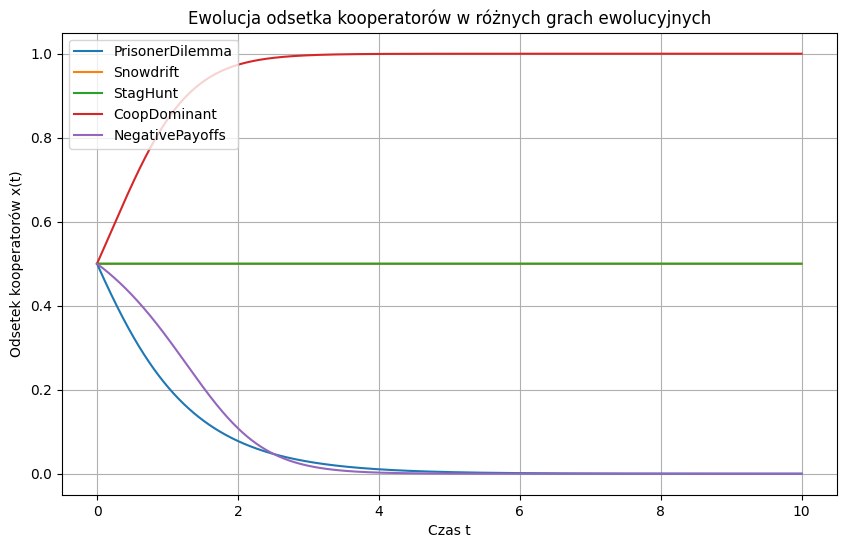

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

parameter_sets = {
    "PrisonerDilemma": {"R": 3, "S": 0, "T": 5, "P": 1},
    "Snowdrift": {"R": 3, "S": 1, "T": 4, "P": 0},
    "StagHunt": {"R": 4, "S": 0, "T": 3, "P": 1},
    "CoopDominant": {"R": 5, "S": 2, "T": 3, "P": 1},
    "NegativePayoffs": {"R": 2, "S": -3, "T": 1, "P": -1},
}

x0 = 0.5
t_max = 10
dt = 0.001
times = np.arange(0, t_max, dt)

plt.figure(figsize=(10, 6))

for name, params in parameter_sets.items():
    R, S, T, P = params["R"], params["S"], params["T"], params["P"]

    def pi_C(x):
        return R * x + S * (1 - x)

    def pi_D(x):
        return T * x + P * (1 - x)

    def pi_bar(x):
        return x * pi_C(x) + (1 - x) * pi_D(x)

    def dx_dt(x):
        return x * (pi_C(x) - pi_bar(x))

    x_vals = np.zeros_like(times)
    x_vals[0] = x0

    for i in range(1, len(times)):
        x_vals[i] = x_vals[i - 1] + dx_dt(x_vals[i - 1]) * dt
        x_vals[i] = np.clip(x_vals[i], 0, 1)

    plt.plot(times, x_vals, label=name)

plt.xlabel("Czas t")
plt.ylabel("Odsetek kooperatorów x(t)")
plt.title("Ewolucja odsetka kooperatorów w różnych grach ewolucyjnych")
plt.grid(True)
plt.legend()
plt.show()


### Wyniki

### Podsumowanie eksperymentu

| Nazwa gry | Typ dynamiki | Równowaga \(x^*\) | Interpretacja |
|:--|:--|:--|:--|
| Prisoner’s Dilemma | Zanikanie współpracy | \(x^* = 0\) | Egoizm wygrywa |
| Snowdrift | Współistnienie | \(0 < x^* < 1\) | Częściowa współpraca |
| Stag Hunt | Dwie równowagi | \(x^* = 0\) lub \(1\) | Efekt zaufania |
| Coop Dominant | Współpraca dominuje | \(x^* = 1\) | Dobro zwycięża |
| Negative Payoffs | Częściowa stabilizacja | \(x^* \approx 0\) | Współpraca ogranicza straty |

---